In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

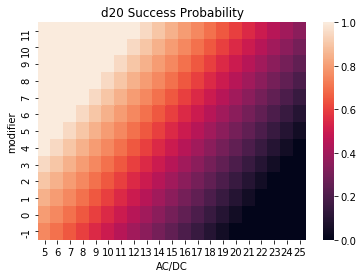

In [3]:
#Normal
bonus = range(11,-2,-1)
DC = range(5,26)

prob = np.zeros((len(bonus), len(DC)))

with open("Normal.tsv", "w") as tsv_file:
    tsv_file.write('mod\tdc\tprob\n')
    for i, b in enumerate(bonus):
        for j,d in enumerate(DC):
            prob[i,j] = max(0,min((21-d+b)/20,1))
            prob2 = max(0,min((21-d+b)/20,1))
            tsv_file.write(str(i) + '\t' + str(d) + '\t' + str(prob2) + '\n')
        
g = sns.heatmap(prob)
g.set(xticklabels = DC)
g.set(yticklabels = bonus)
g.set(ylabel='modifier')
g.set(xlabel='AC/DC')
g.set(title='d20 Success Probability')

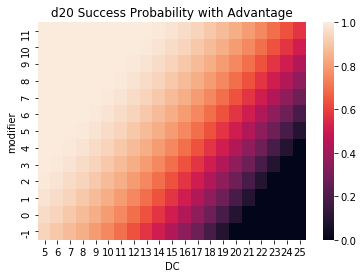

In [4]:
#With advantage
bonus = range(11,-2,-1)
DC = range(5,26)


# calculate the roll probabilities
# Probability of getting a roll at least as high as N; N = # on die

def prob_roll(n):
    return (399-n**2+2*n)/400

prob = np.zeros((len(bonus), len(DC)))

with open("Advantage.tsv", "w") as tsv_file:
    tsv_file.write('mod\tdc\tprob\n')
    for i, b in enumerate(bonus):
        for j,d in enumerate(DC):
            roll = max(1,min(20,d-b)) #What roll is needed to pass a particular check
            p = prob_roll(roll)
            if d-b > 20:
                p = 0
            if d-b < 1:
                p = 1
            prob[i,j] = max(0,min(p,1))
            prob2 = max(0,min(p,1))
            tsv_file.write(str(i) + '\t' + str(d) + '\t' + str(prob2) + '\n')
        
        
g = sns.heatmap(prob)
g.set(xticklabels = DC)
g.set(yticklabels = bonus)
g.set(ylabel='modifier')
g.set(xlabel='DC')
g.set(title='d20 Success Probability with Advantage')

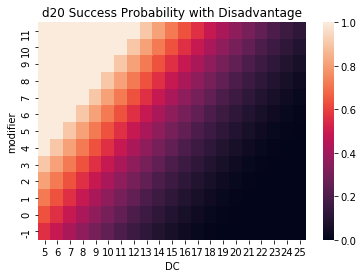

In [5]:
#With disadvantage
bonus = range(11,-2,-1)
DC = range(5,26)

# calculate the roll probabilities
# Probability of getting a roll at least as high as N; N = # on die
def prob_roll(n):
    return (n**2-42*n+441)/400

prob = np.zeros((len(bonus), len(DC)))

with open("Disadvantage.tsv", "w") as tsv_file:
    tsv_file.write('mod\tdc\tprob\n')
    for i, b in enumerate(bonus):
        for j,d in enumerate(DC):
            roll = max(1,min(20,d-b)) #What roll is needed to pass a particular check
            p = prob_roll(roll)
            if d-b > 20:
                p = 0
            if d-b < 1:
                p = 1
            prob[i,j] = max(0,min(p,1))
            prob2 = max(0,min(p,1))
            tsv_file.write(str(i) + '\t' + str(d) + '\t' + str(prob2) + '\n')
        
g = sns.heatmap(prob)
g.set(xticklabels = DC)
g.set(yticklabels = bonus)
g.set(ylabel='modifier')
g.set(xlabel='DC')
g.set(title='d20 Success Probability with Disadvantage')